In [11]:
using Plots
using CSV
using Tables
using DataFrames
using Statistics

In [38]:
function linear2cartesian(s)
    return collect(Tuple(CartesianIndices((max_progress, max_power, max_h2o, max_o2, max_food))[s]))

end


linear2cartesian (generic function with 1 method)

In [13]:
infile = "OVERNIGHT DATA.csv"
df = CSV.read(infile, DataFrame, header = false)
Data = Matrix(df)
initial_state = df[1,1]
indices_restart = findall(x -> x == initial_state, df[:, 1])
steps = []

for i in 2:length(indices_restart)
    if (df[indices_restart[i]-1, 3] != 1000000)
        steps = push!(steps, 0)
    else 
        steps = push!(steps, (indices_restart[i] - indices_restart[i-1]))
    end
end


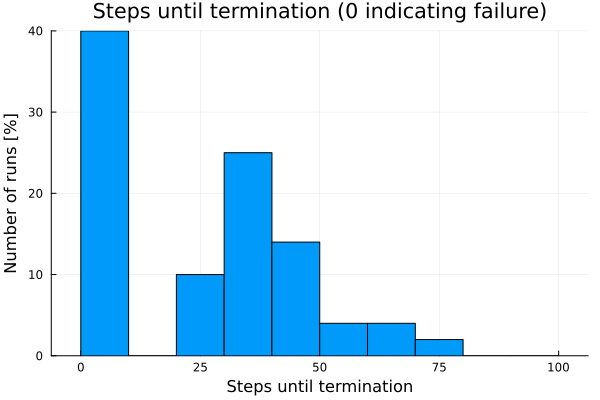

In [14]:

histogram(steps; bins = 0:10:100, label=false, title = "Steps until termination (0 indicating failure)" )
ylabel!("Number of runs [%]")
xlabel!("Steps until termination")

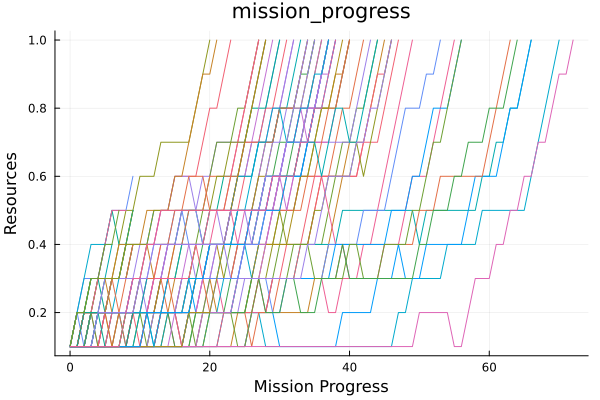

In [43]:
#plot Mission Progress over Resources

# Dimensions
max_progress = 10
max_power = 50
max_h2o = 50
max_o2 = 50
max_food = 50

p1 = plot()
states = []
for i in 2:(length(indices_restart))

    states = Data[indices_restart[i-1]:(indices_restart[i]-1), 1]
    states = push!(states, Data[(indices_restart[i]-1), 4])
    states = stack([linear2cartesian(state) for state in states], dims = 1)
    
    mission = states[:,1]/max_progress
    resources_E = states[:, 2]/max_power
    resources_H2O = states[:,3]/max_h2o
    resources_oxy = states[:,4]/max_o2
    resources_food = states[:,5]/max_food
    resources_total = (resources_E  + resources_H2O + resources_oxy + resources_food)/(max_power + max_h2o + max_o2 + max_food)
    t = range(0, length=length(mission))

    plot!(p1, t, mission, legend=false, title = "Mission Progress")
    #plot!(p1, t, resources_E, legend=false, title = "Power Accumulation over Time")
    #plot!(p1, t, resources_H2O, legend=false, title = "Water Accumulation over Time")
    #plot!(p1, t, resources_oxy, legend=false, title = "Oxygen Accumulation over Time")
    #plot!(p1, t, resources_food, legend=false, title = "Food Accumulation over Time")

    vline!(p1, 10)
end

ylabel!("Resources")
xlabel!("Mission Progress")
#ylims!(0.9, (state_dimensions[1] + state_dimensions[2] + 1))
#xlims!(0.9, state_dimensions[3] + 0.5)

#savefig(p1, "Mission Progress VS Resources.pdf")